<a href="https://colab.research.google.com/github/ddelrosa/CS489/blob/main/notebooks/Generate_images_with_Gemini_and_Vertex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Gemini and Vertex can generate images for online sales</b>

Gemini, Google's latest and most advanced model, can help you create beautiful images with Vertex's image generation API. Use this notebook to generate images you can use for online marketing.

<b>[Required] Set up a Google Cloud account</b>

Okay so we get it, this part is hard, but in order to use the Cloud speech-to-text API you need to set up a Cloud account, project, and billing. Start [here](https://console.cloud.google.com/getting-started).

Once you've done that, come back here.

In [1]:
#@title Authenticate with Google Cloud and your project ID

import vertexai
from vertexai.preview.vision_models import Image, ImageGenerationModel

from google.colab import auth

gcp_project_id = 'cs489-451216' # @param {type: "string"}

auth.authenticate_user(project_id=gcp_project_id)

vertexai.init(project=gcp_project_id)

In [4]:
#@title Configure Gemini API key

#Access your Gemini API key

import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'GOOGLE_API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}')
   raise e
except userdata.NotebookAccessError as e:
  print(f'You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

model = genai.GenerativeModel('gemini-pro')

In [24]:
#@title Use Gemini to generate an image prompt for your item

item_selling = 'chase bank logo' #@param {type: "string"}

model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

prompttext = f"""
  I'm creating the {item_selling}. I need it to be accurate and represent the chase.com logo
  """

response = chat.send_message(prompttext)

response.text

'[Image of the Chase Bank logo]\n\n**Design Specifications:**\n\n**Shape:**\n* Octagon with rounded corners\n\n**Colors:**\n* Blue and white\n* CMYK: C100 M0 Y0 K0 (Blue)\n* CMYK: C0 M0 Y0 K0 (White)\n\n**Gradient:**\n* The blue octagon has a radial gradient from a darker shade of blue on the outer edge to a lighter shade of blue on the inner edge.\n\n**Typography:**\n* The "Chase" wordmark is set in a custom font with the following characteristics:\n    * Sans-serif\n    * Condensed\n    * Lowercase letters\n    * White color\n\n**Layout:**\n* The wordmark is centered within the octagon, with the letter "h" positioned slightly above the center.\n\n**Additional Notes:**\n\n* The logo should be used on a white background.\n* The minimum clear space around the logo should be equal to the height of the octagon.\n* The logo should not be altered or modified in any way.'

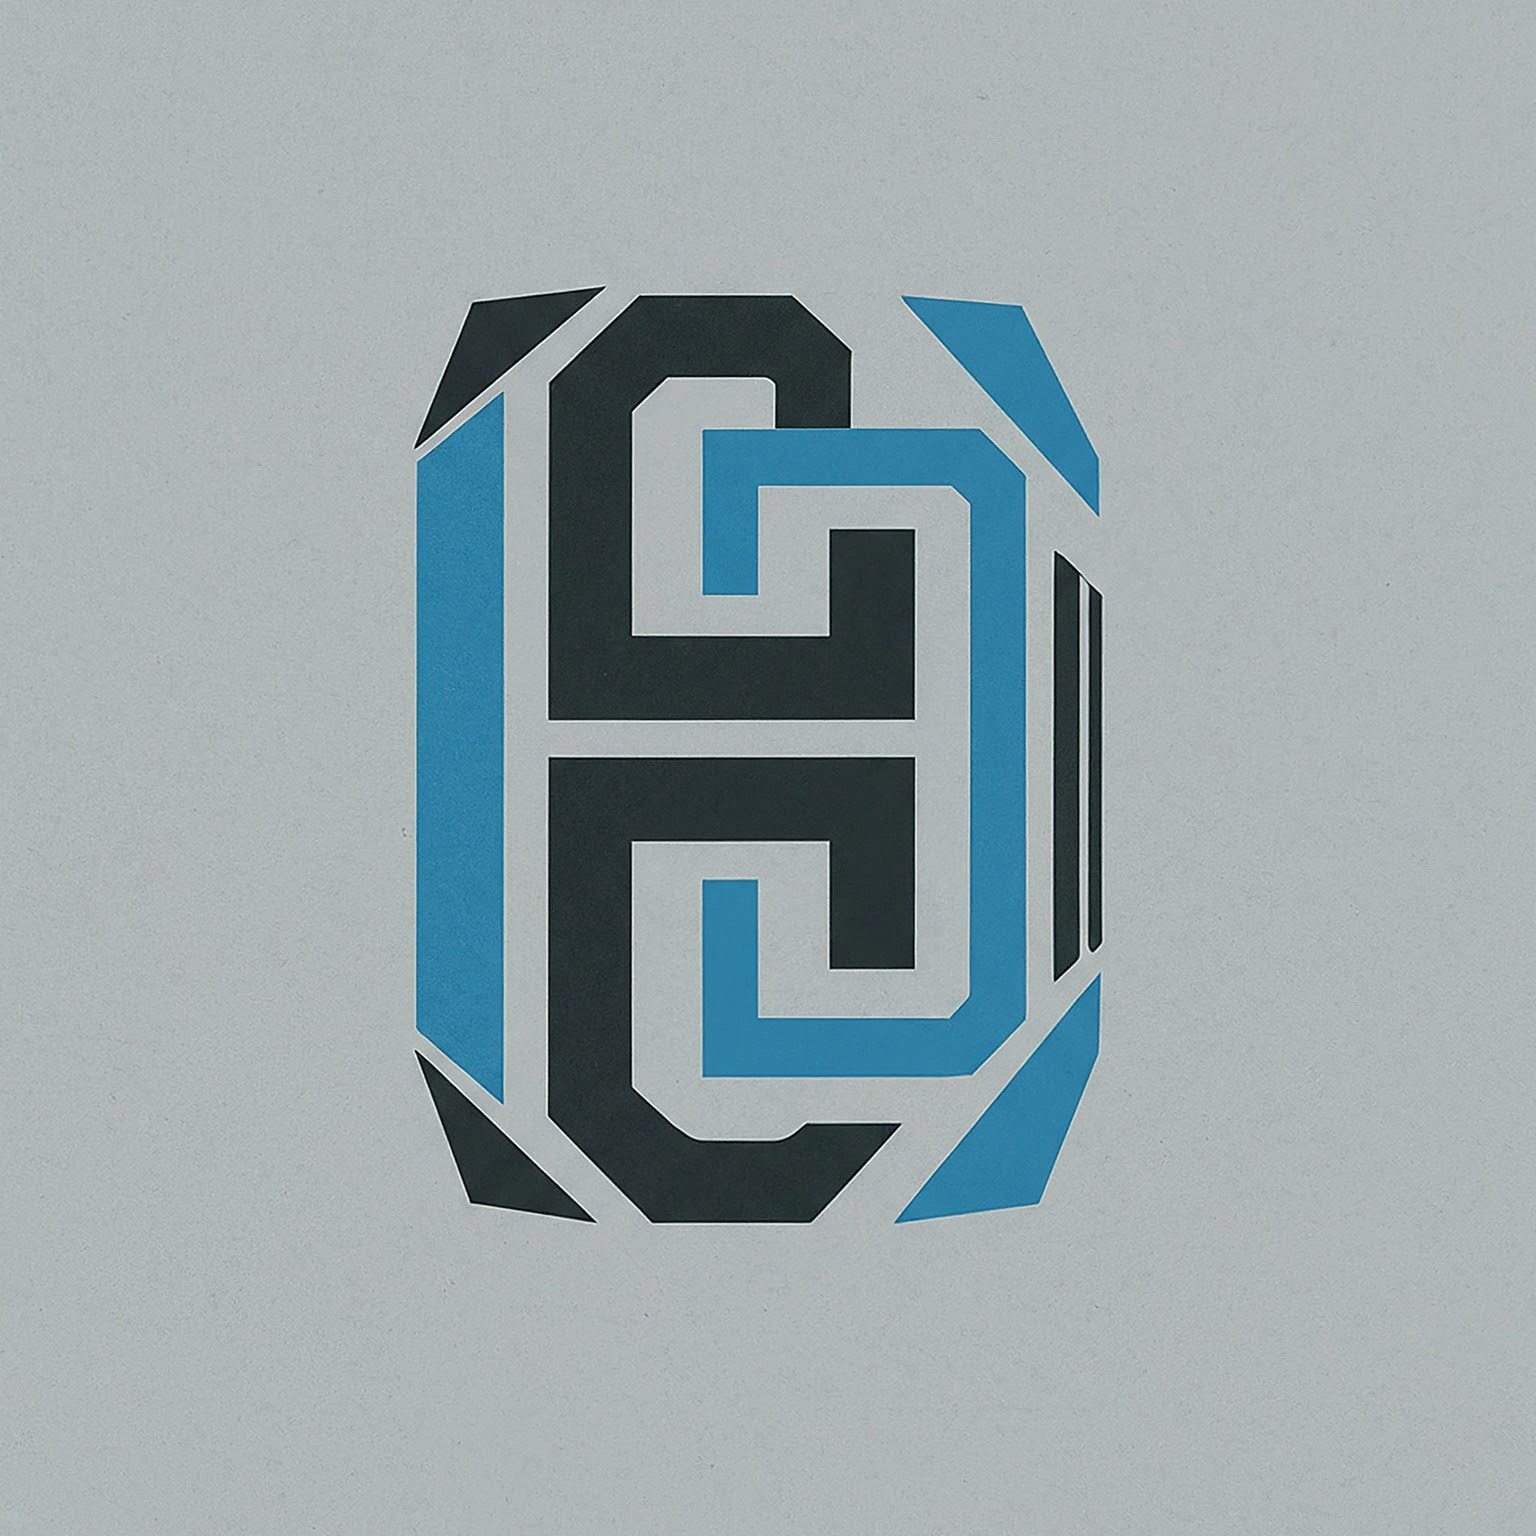

In [56]:
#@title Use Vertex to generate an image

from IPython.display import Image
# prompt = "create 4 trapazoids shapes. make the background all white and surround the trapazoids"
prompt = "Design a logo that consists of an uppercase black word. the word rhymes with chase and to the right of the word a geometric blue emblem. The emblem is an open octagon, giving a modern and stable look.The background is white, and the design should convey trust and reliability."

model = ImageGenerationModel.from_pretrained("imagegeneration@005")
images = model.generate_images(prompt)


images[0].save(location="./gen-img1.png", include_generation_parameters=True)

Image('./gen-img1.png', height=500)